# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [2]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

Hello


### Step 2: Read in your data set

In [3]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

In [6]:
len(df_raw)

400

#### Question 2. Create a summary table.

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of potential GRE scores is on a much larger scale (220-800) than GPA (0.00-4.00), so while it is conceivable that GRE could have a standard deviation that is less than or equal to GPA, it stands to reason that GRE would have the larger absolute standard deviation.

#### Question 4. Drop data points with missing data.


In [9]:
df_new = df_raw.dropna()

397

In [10]:
df_new.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [11]:
len(df_new)

397

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: Using count(), we can see that all columns have 397 non-na entries, and using len() we can see that the df has 397 rows. 

#### Question 6. Create box plots for GRE and GPA.

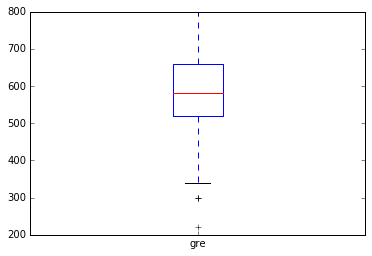

In [17]:
df_new[['gre']].plot(kind="box")

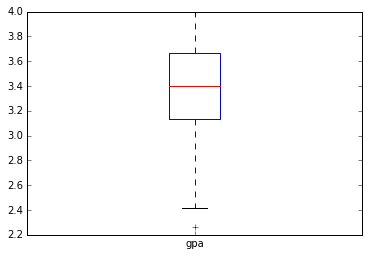

In [18]:
df_new[['gpa']].plot(kind="box")

#### Question 7. What do these plots show?

Answer: The max, min, 1st, 2nd (median), and 3rd quartiles, and any outliers.

#### Question 8. Describe each distribution.

The GRE plot shows a range of 220-800, with (at least) two outliers on the low end at approximately 220 and 300.  The lowest non-outlier number is around 340, while the highest number is 800.  We see that the 1st quartile is about 520 and the third is 660, with a median of 580.  Without seeing a histogram, we see that the distribution looks potentially normal, with perhaps some left skewness.

The GPA plot looks similar.  We see that it also has (at least) one outlier, which is slightly above 2.2.  We can see the max of 4.00 and a non-outlier min of about 2.4.  We can see the first quartile and third quartile, 3.13 and 3.67 respectively, and the median of 3.395.  

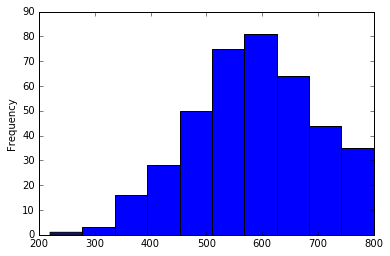

In [20]:
df_new.gre.plot(kind="hist")


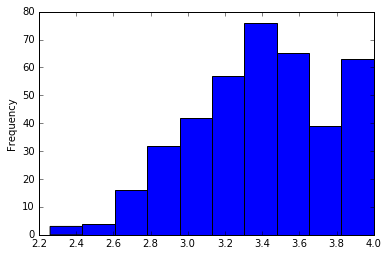

In [21]:
df_new.gpa.plot(kind="hist")

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: Neither distribution appears to fit the normality assumption.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: If we are trying to use a model that has an assumption of normality, then yes, we might want to try to correct the distribution.

#### Question 11. Which of our variables are potentially colinear?

In [22]:
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE are somewhat highly correlated, but all other correlations look to be slight.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: Regress the factor variable of admit on the factor variable of prestige.  Examine odds ratios for each prestige value (i.e. having a school prestige of 1 makes you x% more likely to be admitted to grad school than a school prestige of 1).

#### Question 14. What is your hypothesis?

Answer: The more prestigious one's undergraduate school, the more likely the applicant is to be admitted to grad school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

In [26]:
df_new.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


#### 2. Bonus: Log transform the skewed data.

In [30]:
log_gre = np.log(df_new.gre)
log_gpa = np.log(df_new.gpa)

d = {'admit' : df_new.admit,
     'log_gre' : pd.Series(log_gre),
     'log_gpa' : pd.Series(log_gpa),
     'prestige' : df_new.prestige}

df_new2 = pd.DataFrame(d)
df_new2.head()

,admit,log_gpa,log_gre,prestige
0,0,1.283708,5.940171,3
1,1,1.300192,6.492240,3
2,1,1.386294,6.684612,1
3,1,1.160021,6.461468,4
4,0,1.075002,6.253829,4


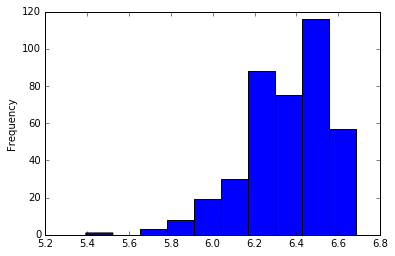

In [33]:
log_gre.plot(kind="hist")

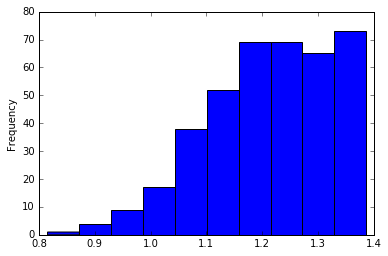

In [34]:
log_gpa.plot(kind="hist")

#### 3. Advanced: Impute missing data.